---
# Data Science and Artificial Intelliegence Practicum
## 4-modul. Data Visualization
---

## 4.4 - Bar charts and heatmap in seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Bar chart
A bar chart is very useful for comparing values in different categories.

![bar-graph-fruit.svg](https://www.mathsisfun.com/data/images/bar-graph-fruit.svg)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.columns = ['maydon','aholi']
df

,maydon,aholi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0
Namangan viloyati,7900.0,1862000.0
Navoiy viloyati,110800.0,767500.0
Qashqadaryo viloyati,28400.0,2029000.0
Qoraqalpogʻiston Respublikasi,160000.0,1200000.0


#### **`seaborn.barplot`**
Show point estimates and confidence intervals as rectangular bars.

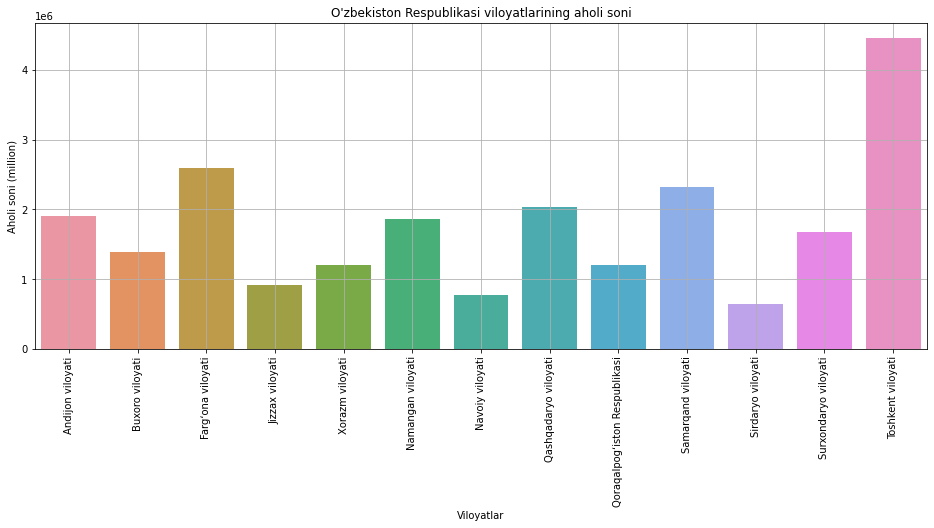

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.index, y=df.aholi)

plt.title("O'zbekiston Respublikasi viloyatlarining aholi soni")
plt.xlabel("Viloyatlar")
plt.ylabel("Aholi soni (million)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

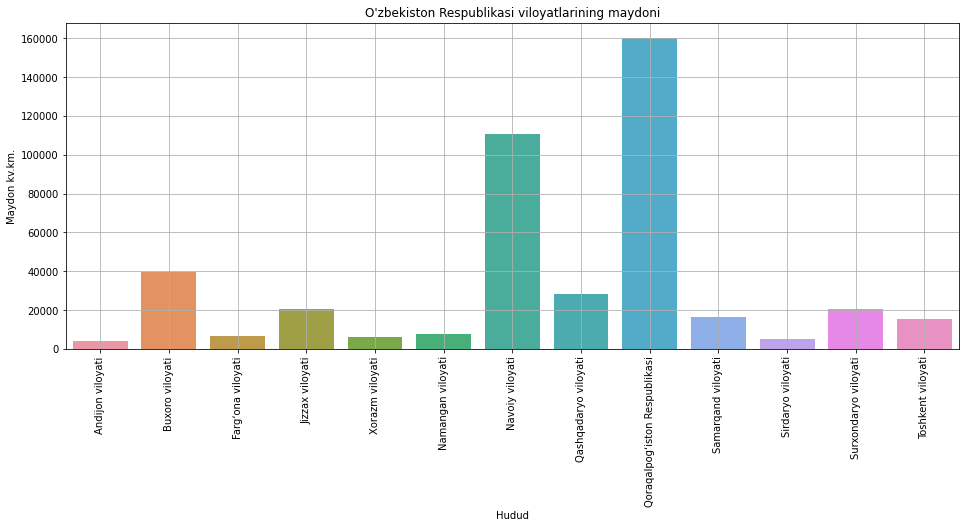

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.index, y=df.maydon)

plt.title("O'zbekiston Respublikasi viloyatlarining maydoni")
plt.xlabel("Hudud")
plt.ylabel("Maydon kv.km.")
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Heatmap
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 

![developers-roles.png](https://researchgate.net/profile/Joao-Montandon/publication/344330355/figure/fig2/AS:938226835525640@1600702117855/Heatmap-indicating-how-hard-skills-are-distributed-among-developers-roles.png)

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv",
                 index_col=0,
                 parse_dates=[0],
                 usecols=[0,1])
df.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]
df.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [ ]:
df.groupby(['month', 'year']).max().head(10)

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718

In [ ]:
df_m = df.groupby(['month', 'year']).max().unstack(level=0)
df_m

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

#### **`seaborn.heatmap`**
Plot rectangular data as a color-encoded matrix.

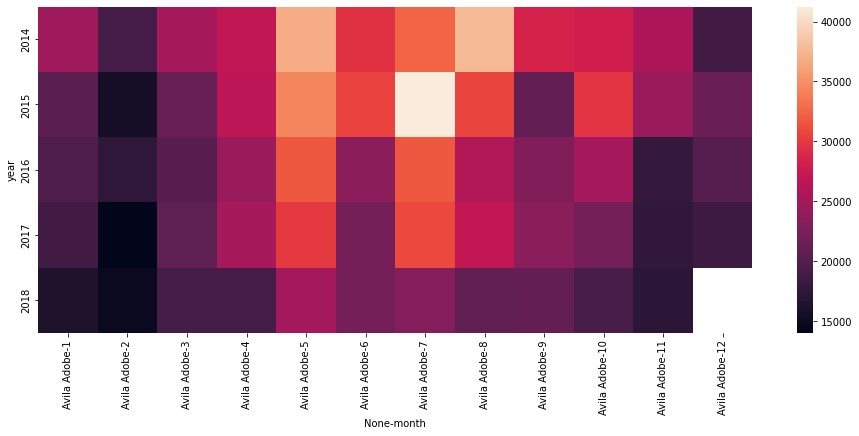

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=df_m)
plt.show()

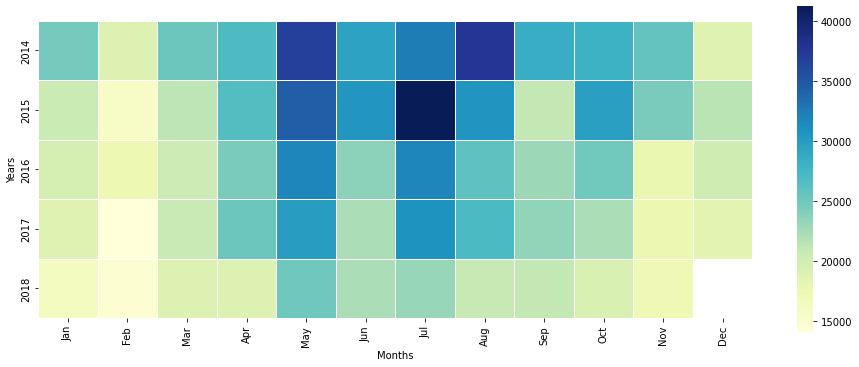

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=df_m, cmap="YlGnBu", linewidths=1, square=True)
plt.xlabel("Months")
plt.ylabel("Years")
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=months_labels)
plt.show()

**supported colors for `cmap` parameter in `seaborn.heatmap`**

`['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']`

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 10), columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df2.head()

,a,b,c,d,e,f,g,h,i,j
0,0.184915,0.493564,0.288931,0.563765,0.551085,0.997905,0.126105,0.831989,0.077039,0.595456
1,0.129616,0.385470,0.288320,0.877094,0.698341,0.971643,0.359121,0.843961,0.938517,0.258018
2,0.084779,0.183590,0.634230,0.634541,0.883965,0.479950,0.618328,0.367211,0.303046,0.188237
3,0.387572,0.686483,0.802641,0.711680,0.256233,0.754930,0.184951,0.920317,0.783713,0.386314
4,0.823668,0.523988,0.486097,0.208676,0.345173,0.282157,0.939626,0.966055,0.522526,0.031650


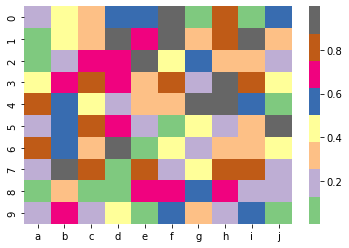

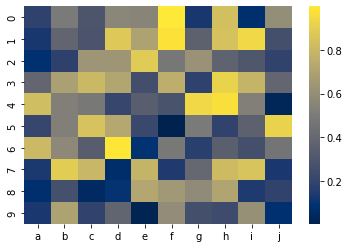

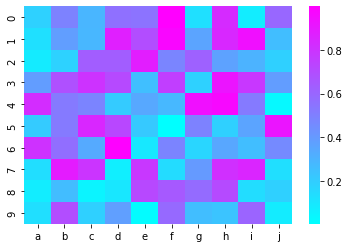

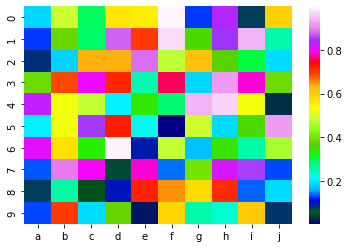

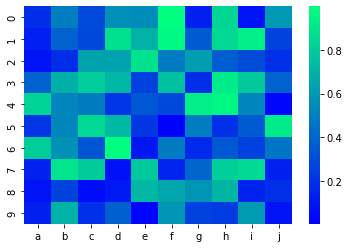

In [ ]:
sns.heatmap(df2, cmap='Accent')
plt.show()

sns.heatmap(df2, cmap='cividis')
plt.show()

sns.heatmap(df2, cmap='cool')
plt.show()

sns.heatmap(df2, cmap='gist_ncar')
plt.show()

sns.heatmap(df2, cmap='winter')
plt.show()

### Grouped barplots
A Grouped barplot is useful when we have multiple categorical variables.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")
df.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


The dataset shows the average number of minutes* delayed by different airlines (each column is an abbreviation of the airline name) in different months.

*a negative value means the plane arrived early.

We can see the month-by-month values for an individual airline in a bar graph:

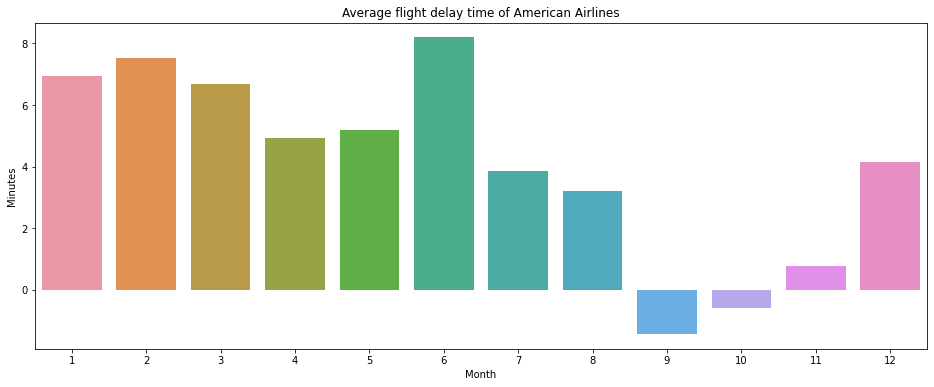

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Month'], y=df['AA'])
plt.title("Average flight delay time of American Airlines")
plt.ylabel('Minutes')
plt.show()

Now let's compare several airlines side by side. To do this, we need to change the shape of our DF.

#### `DataFrame.melt`
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

![reshaping_melt.png](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

In [ ]:
df.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


`melt` function is used to bring a table from wide to long position. In this case, several columns in `df` can be brought to a single `variable` column. Values are displayed in the `value` column for each `variable`.

In [ ]:
df.melt(id_vars=['Month'])

,Month,variable,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878
...,...,...,...
163,8,WN,5.532108
164,9,WN,-1.336260
165,10,WN,-0.688851
166,11,WN,0.995684


In [ ]:
# using .melt() we can extract specific airlines that we want
df_long = df.melt(id_vars=['Month'], value_vars=['AA', 'MQ'])
df_long.head()

,Month,variable,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878


#### `seaborn.catplot`
Figure-level interface for drawing categorical plots onto a FacetGrid.


We use the `catplot` method to draw a grouped barplot. Different graphs can be drawn using `catplot`, using its `kind='bar'` parameter, we indicate that we want to draw a `bar` graph.

Next, we specify the `x` and `y` axis values, and most importantly we use the `hue='variable'` parameter to specify which column to group by.

---
Guruhlangan ustunli grafik chizish uchun `catplot` metodidan foydalanamiz. `catplot` yordamida turli grafiklar chizish mumkin, shuning `kind='bar'` parametri yordamida aynan `bar` grafik chizmoqchi ekanmizni ko'rsatamiz.

So'ngra, `x` va `y` o'qi qiymatlarini ko'rsatamiz va eng muhimi guruhlash qaysi ustun bo'yicha bo'lishini ko'rsatish uchun `hue='variable'` parametridan foydalanmiz.

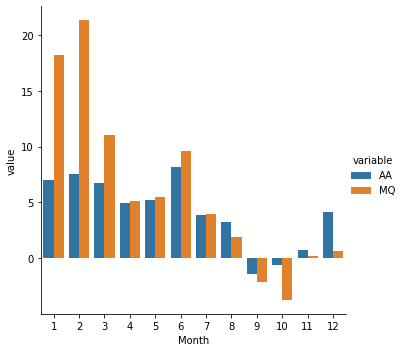

In [ ]:
sns.catplot(data=df_long, kind='bar', x='Month', y='value', hue='variable')
plt.show()

In [ ]:
# using .melt() we can extract specific airlines that we want
df_long = df.melt(id_vars=['Month'], value_vars=['AA', 'AS', 'DL', 'WN'])
df_long.head()

,Month,variable,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878


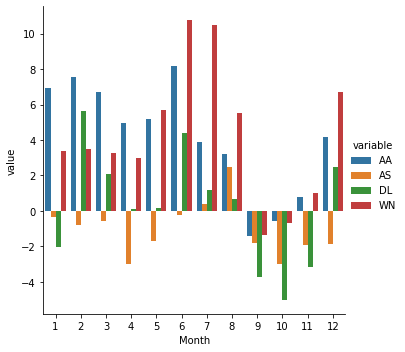

In [ ]:
sns.catplot(data=df_long, kind='bar', x='Month', y='value', hue='variable')
plt.show()

As you can see, understanding such a graph is quite difficult, here again the `heatmap` graph helps us:

---
Ko'rib turganingizdek, bunday grafikni tushunish o'ziga yarasha qiyinchilik tug'diradi, bu yerda bizga yana heatmap grafigi yordamga keladi:

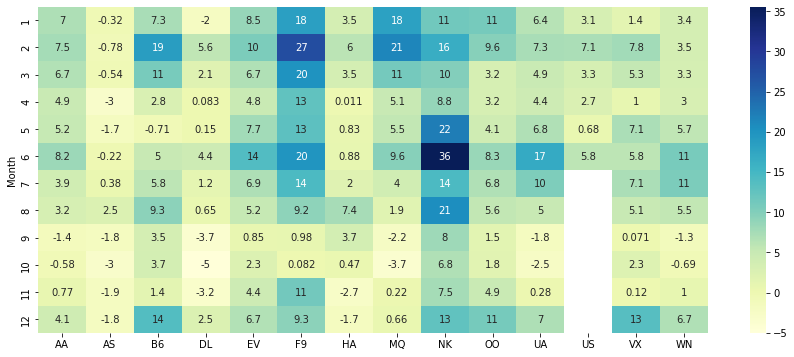

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(data=df.set_index('Month'), cmap="YlGnBu", annot=True)
plt.show()